# Recruit Restaurant Visitor Forecasting - EDA Mini Project

**Goal:** Analyze visitor patterns (day-of-week, weekend vs weekday, monthly trends) to generate operational insights.

## Dataset
- Source: Kaggle "Recruit Restaurant Visitor Forecasting"
- File used: 'air_visit_data.csv'
- Key columns:
  - 'visit_date' : date of restaurant visit
  - 'visitors' : number of visitors
  - 'air_store_id' : restaurant identifier

## Methods
1. Loaded restaurant visitor data into a pandas DataFrame.
2. Converted the 'visit_date' column from object to datetime format.
3. Created time-based features:
   - 'day_of_week' using '.dt.day_name()'
   - 'is_weekend' using boolean logic
   - 'month' using '.dt.month'
4. Calculated average visitors using 'groupby' and 'mean'.
5. Visualized patterns using bar charts and line charts.

## Results
The following sections summarize key patterns observed in restaurant visitor traffic.

## Data Loading
The dataset was uploaded and loaded into the Colab environment for analysis.


In [1]:
from google.colab import files
files.upload()

Saving air_visit_data.csv to air_visit_data.csv


{'air_visit_data.csv': b'air_store_id,visit_date,visitors\nair_ba937bf13d40fb24,2016-01-13,25\nair_ba937bf13d40fb24,2016-01-14,32\nair_ba937bf13d40fb24,2016-01-15,29\nair_ba937bf13d40fb24,2016-01-16,22\nair_ba937bf13d40fb24,2016-01-18,6\nair_ba937bf13d40fb24,2016-01-19,9\nair_ba937bf13d40fb24,2016-01-20,31\nair_ba937bf13d40fb24,2016-01-21,21\nair_ba937bf13d40fb24,2016-01-22,18\nair_ba937bf13d40fb24,2016-01-23,26\nair_ba937bf13d40fb24,2016-01-25,21\nair_ba937bf13d40fb24,2016-01-26,11\nair_ba937bf13d40fb24,2016-01-27,24\nair_ba937bf13d40fb24,2016-01-28,21\nair_ba937bf13d40fb24,2016-01-29,26\nair_ba937bf13d40fb24,2016-01-30,6\nair_ba937bf13d40fb24,2016-02-03,18\nair_ba937bf13d40fb24,2016-02-04,12\nair_ba937bf13d40fb24,2016-02-05,45\nair_ba937bf13d40fb24,2016-02-06,15\nair_ba937bf13d40fb24,2016-02-08,19\nair_ba937bf13d40fb24,2016-02-09,15\nair_ba937bf13d40fb24,2016-02-10,32\nair_ba937bf13d40fb24,2016-02-11,3\nair_ba937bf13d40fb24,2016-02-12,26\nair_ba937bf13d40fb24,2016-02-13,8\nair_ba937b

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 5)
plt.rcParams['axes.grid'] = True

df = pd.read_csv("air_visit_data.csv")
df.head()


air_store_id  visit_date  visitors
0  air_ba937bf13d40fb24  2016-01-13        25
1  air_ba937bf13d40fb24  2016-01-14        32
2  air_ba937bf13d40fb24  2016-01-15        29
3  air_ba937bf13d40fb24  2016-01-16        22
4  air_ba937bf13d40fb24  2016-01-18         6

In [3]:
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252108 entries, 0 to 252107
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   air_store_id  252108 non-null  object
 1   visit_date    252108 non-null  object
 2   visitors      252108 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 5.8+ MB


visitors
count  252108.000000
mean       20.973761
std        16.757007
min         1.000000
25%         9.000000
50%        17.000000
75%        29.000000
max       877.000000

In [4]:
df['visit_date'] = pd.to_datetime(df['visit_date'])

In [5]:
df['day_of_week'] = df['visit_date'].dt.day_name()
df[['visit_date','day_of_week','visitors']].head()


visit_date day_of_week  visitors
0 2016-01-13   Wednesday        25
1 2016-01-14    Thursday        32
2 2016-01-15      Friday        29
3 2016-01-16    Saturday        22
4 2016-01-18      Monday         6

### Average Visitors by Day of Week

We grouped the data by day of the week and calculated the average number of visitors to understand weekly demand patterns.

In [6]:
dow_avg = df.groupby('day_of_week')['visitors'].mean()
dow_avg


day_of_week
Friday       23.072737
Monday       17.177009
Saturday     26.313688
Sunday       23.873362
Thursday     18.922702
Tuesday      17.672137
Wednesday    19.230121
Name: visitors, dtype: float64

In [7]:
order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
dow_avg_reordered = dow_avg.reindex(order)
dow_avg_reordered


day_of_week
Monday       17.177009
Tuesday      17.672137
Wednesday    19.230121
Thursday     18.922702
Friday       23.072737
Saturday     26.313688
Sunday       23.873362
Name: visitors, dtype: float64

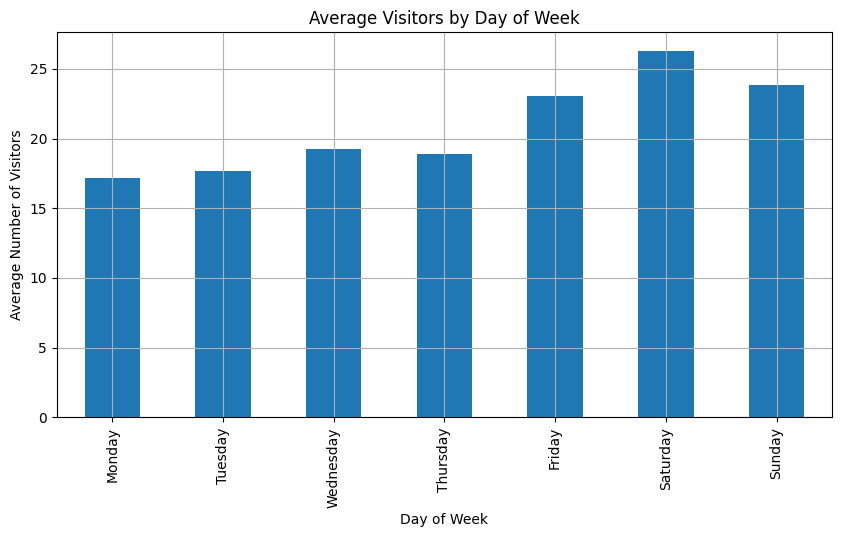

In [8]:

dow_avg_reordered.plot(kind='bar')
plt.xlabel('Day of Week')
plt.ylabel('Average Number of Visitors')
plt.title('Average Visitors by Day of Week')
plt.show()


**Interpretation:**

Average visitor counts vary across the week. Higher traffic on certain days, particularly weekends, suggests weekly patterns that could inform staffing and operational decisions.

### Weekend vs Weekday Average Visitors

We compared average visitor counts between weekends and weekdays to examine whether a weekend effect exists.


In [9]:
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])


In [10]:
df[['day_of_week', 'is_weekend']].head(10)


day_of_week  is_weekend
0   Wednesday       False
1    Thursday       False
2      Friday       False
3    Saturday        True
4      Monday       False
5     Tuesday       False
6   Wednesday       False
7    Thursday       False
8      Friday       False
9    Saturday        True

In [11]:
weekend_avg = df.groupby('is_weekend')['visitors'].mean()
weekend_avg


is_weekend
False    19.351612
True     25.256870
Name: visitors, dtype: float64

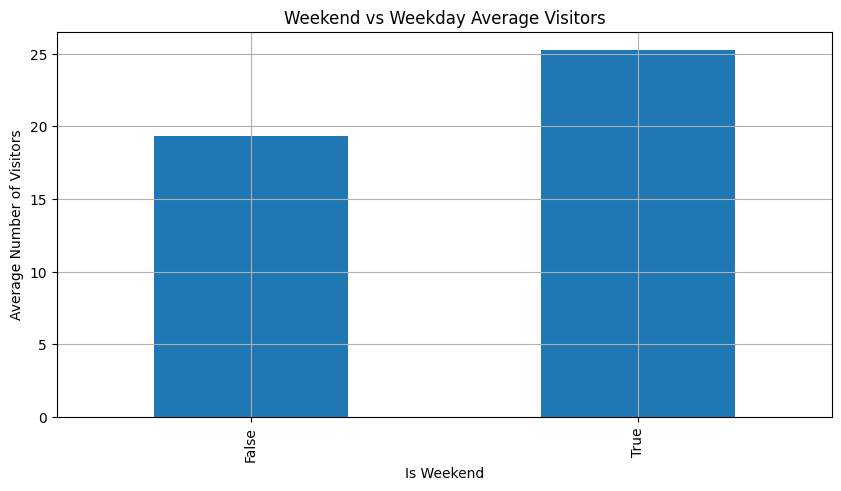

In [12]:
weekend_avg.plot(kind='bar')
plt.xlabel('Is Weekend')
plt.ylabel('Average Number of Visitors')
plt.title('Weekend vs Weekday Average Visitors')
plt.show()


**Interpretation:**  
The results indicate that average visitor numbers differ between weekends and weekdays, supporting the presence of a weekend effect in restaurant demand.


### Average Visitors by Month

We calculated average visitors by month to explore potential seasonal or time-based trends.


In [13]:
df['month'] = df['visit_date'].dt.month
df[['visit_date', 'month']].head()

visit_date  month
0 2016-01-13      1
1 2016-01-14      1
2 2016-01-15      1
3 2016-01-16      1
4 2016-01-18      1

In [14]:
month_avg = df.groupby('month')['visitors'].mean()
month_avg

month
1     19.976758
2     20.477695
3     22.400360
4     21.816002
5     22.009313
6     21.319510
7     21.267653
8     19.748489
9     19.908445
10    20.319715
11    19.751625
12    23.128840
Name: visitors, dtype: float64

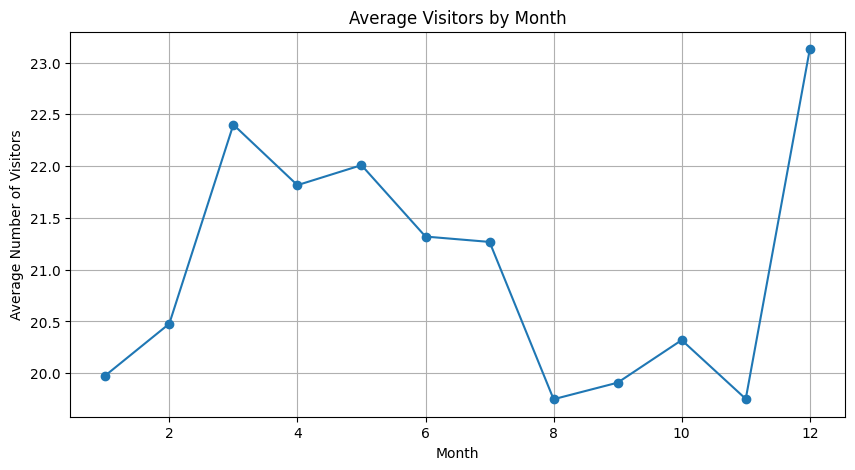

In [15]:
import matplotlib.pyplot as plt

month_avg.plot(kind='line',marker='o')
plt.xlabel('Month')
plt.ylabel('Average Number of Visitors')
plt.title('Average Visitors by Month')
plt.show()

**Interpretation:**  
Monthly averages fluctuate throughout the year, which may reflect seasonality, holidays, or promotional events affecting visitor behavior.


## Key Insights
- Visitor demand shows clear weekly patterns across days of the week.
- Weekend visitor averages differ from weekdays, indicating a weekend effect.
- Monthly fluctuations suggest seasonality or event-driven changes in demand.


## Next Steps
- Analyze visitor patterns at the individual store level using `air_store_id`.
- Examine variability and outliers, not just averages.
- Incorporate holiday or event indicators to better explain demand spikes.
